#　地図と震度の大きさ

![スクリーンショット 2025-11-19 132807.png](<attachment:スクリーンショット 2025-11-19 132807.png>)
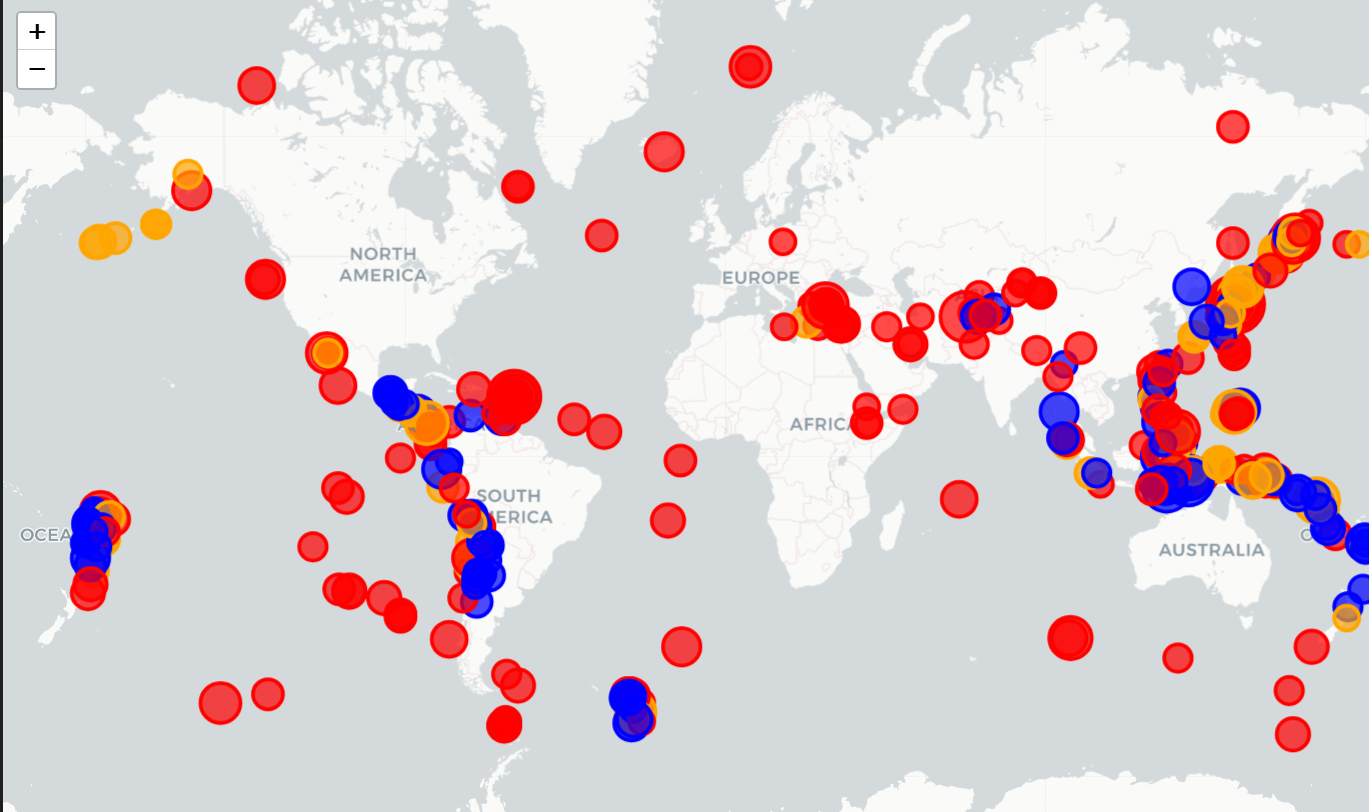

In [15]:
pip install pandas requests matplotlib folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import folium

In [17]:

USGS_API_URL = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.geojson" 


response = requests.get(USGS_API_URL)
data = response.json()


earthquake_features = data['features']
earthquake_data = []

for feature in earthquake_features:
   
    mag = feature['properties']['mag']
    place = feature['properties']['place']
    time = feature['properties']['time']
    
    lon = feature['geometry']['coordinates'][0]
    lat = feature['geometry']['coordinates'][1]
    
    earthquake_data.append({
        'magnitude': mag,
        'place': place,
        'time': time,
        'latitude': lat,
        'longitude': lon
    })


df = pd.DataFrame(earthquake_data)


df['time'] = pd.to_datetime(df['time'], unit='ms')


print(df.head())

   magnitude                                   place                    time  \
0        5.0             133 km ESE of Yamada, Japan 2025-11-19 02:23:19.189   
1        5.0     34 km NNE of Yaguaraparo, Venezuela 2025-11-19 01:38:53.994   
2        5.4  57 km WSW of Puerto Cortés, Costa Rica 2025-11-18 22:36:32.878   
3        4.8                         West Chile Rise 2025-11-18 21:25:50.638   
4        5.3                        Mid-Indian Ridge 2025-11-18 15:35:29.942   

   latitude  longitude  
0   39.2352   143.4678  
1   10.8709   -62.7566  
2    8.7898   -84.0158  
3  -40.3808   -91.4641  
4  -11.9825    65.7403  


In [18]:
import pandas as pd
import requests


USGS_API_URL = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.geojson" 


response = requests.get(USGS_API_URL)
data = response.json()

earthquake_features = data['features']
earthquake_data = []

for feature in earthquake_features:
    
    mag = feature['properties']['mag']
    place = feature['properties']['place']
    time = feature['properties']['time']
    
   
    coordinates = feature['geometry']['coordinates']
    lon = coordinates[0]
    lat = coordinates[1]
    
    depth = coordinates[2]
    
    earthquake_data.append({
        'magnitude': mag,
        'place': place,
        'time': time,
        'latitude': lat,
        'longitude': lon,
        'depth': depth 
    })


df = pd.DataFrame(earthquake_data)


df['time'] = pd.to_datetime(df['time'], unit='ms')


print(df.head())

   magnitude                                   place                    time  \
0        5.0             133 km ESE of Yamada, Japan 2025-11-19 02:23:19.189   
1        5.0     34 km NNE of Yaguaraparo, Venezuela 2025-11-19 01:38:53.994   
2        5.4  57 km WSW of Puerto Cortés, Costa Rica 2025-11-18 22:36:32.878   
3        4.8                         West Chile Rise 2025-11-18 21:25:50.638   
4        5.3                        Mid-Indian Ridge 2025-11-18 15:35:29.942   

   latitude  longitude    depth  
0   39.2352   143.4678   10.000  
1   10.8709   -62.7566  122.975  
2    8.7898   -84.0158   10.000  
3  -40.3808   -91.4641   10.000  
4  -11.9825    65.7403   10.000  


In [19]:

def get_depth_category(depth):
    if depth <= 30:
        return 'Shallow (High Impact)' 
    elif depth <= 70:
        return 'Intermediate'         
    else:
        return 'Deep (Low Impact)'   


df['Impact_Category'] = df['depth'].apply(get_depth_category)

print("Impact カテゴリ別の件数:")

print(df['Impact_Category'].value_counts())

Impact カテゴリ別の件数:
Impact_Category
Shallow (High Impact)    284
Deep (Low Impact)        129
Intermediate             126
Name: count, dtype: int64


In [20]:
import folium



color_map = {
    'Shallow (High Impact)': 'red',    
    'Intermediate': 'orange',          
    'Deep (Low Impact)': 'blue'        
}


center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()


m = folium.Map(location=[center_lat, center_lon], zoom_start=2, tiles='CartoDB Positron')


for index, row in df.iterrows():

    radius = row['magnitude'] ** 2 * 0.5 
    
    
    color = color_map[row['Impact_Category']]
    
    
    popup_text = f"Magnitude: {row['magnitude']:.1f}<br>Place: {row['place']}<br>Depth: {row['depth']:.1f} km<br>Time: {row['time']}"

    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=popup_text
    ).add_to(m)


m

In [21]:
import os


output_dir = 'Week6'
map_output_file = os.path.join(output_dir, 'earthquake_impact_map.html')


if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"フォルダ '{output_dir}' を作成しました。")


m.save(map_output_file)

print(f"地図が {map_output_file} に保存されました。")

地図が Week6\earthquake_impact_map.html に保存されました。
